In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
flight_data_2023 = pd.read_csv('fl2023_train.csv')

flight_data_2023 = flight_data_2023.drop(columns=['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FL_DATE'])
flight_data_2023 = flight_data_2023.dropna()

In [3]:
# One-hot encoding
categorical_features = ['AIRLINE', 'ORIGIN', 'DEST']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(flight_data_2023[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)
encoded_features.index = flight_data_2023.index

In [4]:
# Kết hợp dữ liệu đã mã hóa với các cột khác
data = flight_data_2023.drop(columns=categorical_features)
data = pd.concat([data, encoded_features], axis=1)

In [5]:
# Chuyển tất cả các cột dữ liệu sang kiểu float
data = data.astype(float)

In [6]:
# Chuẩn hóa các cột số
numeric_features = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
                    'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
                    'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                    'DELAY_DUE_LATE_AIRCRAFT']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(columns=['ARR_DELAY'])
y = data['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [10]:
# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0713847094184581e-08
R-squared: 0.9999999999989608


In [11]:
# Tải dữ liệu kiểm tra
test_data = pd.read_csv('fl2023_test.csv')

# Loại bỏ các cột không cần thiết và xử lý dữ liệu giống như dữ liệu huấn luyện
test_data = test_data.drop(columns=['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FL_DATE'])
test_data = test_data.dropna()

# One-hot encoding cho dữ liệu kiểm tra
encoded_test_features = pd.DataFrame(encoder.transform(test_data[categorical_features]))
encoded_test_features.columns = encoder.get_feature_names_out(categorical_features)
encoded_test_features.index = test_data.index

# Kết hợp dữ liệu đã mã hóa với các cột khác
test_data = test_data.drop(columns=categorical_features)
test_data = pd.concat([test_data, encoded_test_features], axis=1)

# Chuyển tất cả các cột dữ liệu sang kiểu float
test_data = test_data.astype(float)

# Chuẩn hóa các cột số trong dữ liệu kiểm tra
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

# Tách dữ liệu kiểm tra thành đầu vào (features) và đầu ra (target)
X_new = test_data.drop(columns=['ARR_DELAY'])
y_new = test_data['ARR_DELAY']

# Dự đoán độ trễ của chuyến bay với mô hình đã huấn luyện
predicted_delay_new = model.predict(X_new)

# Tính toán các chỉ số đánh giá cho dữ liệu mới
mse_new = mean_squared_error(y_new, predicted_delay_new)
r2_new = r2_score(y_new, predicted_delay_new)

print(f'Test MSE: {mse_new}')
print(f'Test R-squared: {r2_new}')

# In kết quả dự đoán
print("Dự đoán độ trễ của các chuyến bay mới:")
for i in range(len(predicted_delay_new)):
    print(f"Chuyến bay {i+1}: {predicted_delay_new[i]} phút")

Test MSE: 1.1822853182600166e-21
Test R-squared: 1.0
Dự đoán độ trễ của các chuyến bay mới:
Chuyến bay 1: 19.000000000049774 phút
Chuyến bay 2: 17.00000000006512 phút
Chuyến bay 3: 18.999999999986656 phút
Chuyến bay 4: 58.00000000001386 phút
Chuyến bay 5: 28.000000000001513 phút
Chuyến bay 6: 20.999999999998266 phút


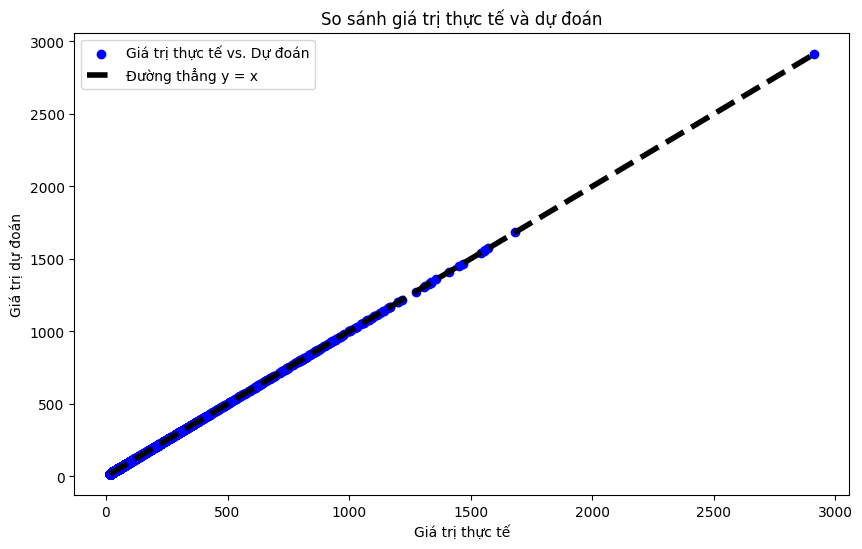

In [13]:
import matplotlib.pyplot as plt

# Plot giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Giá trị thực tế vs. Dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Đường thẳng y = x')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.legend()
plt.show()